## <span style="color: dodgerblue;">📚 1. Library Imports</span>

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix

This section imports all the necessary Python libraries. Key imports include tensorflow.keras for building the model, numpy for data manipulation, matplotlib for plotting, and sklearn utilities for metrics.</span>

## <span style="color: dodgerblue;">🗂️ 2. Data Path Setup & Dimensions

In [ ]:
print(data_train_path)
print(data_test_path)
print(data_val_path)

In [99]:
img_width = 180
img_height =180

## <span style="color: dodgerblue;">💾 3. Data Loading & Class Names

In [100]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 504 files belonging to 30 classes.


In [101]:
road_type = data_train.class_names

In [102]:
road_type

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [103]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 285 files belonging to 30 classes.


In [104]:
data_validation = tf.keras.utils.image_dataset_from_directory(
data_val_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 149 files belonging to 30 classes.


The image_dataset_from_directory utility is used to efficiently load images from the folders. It automatically assigns labels based on the folder names, identifying 30 distinct road sign classes (road_type).

In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

## <span style="color: dodgerblue;">🏗️ 4. CNN Model Architecture</span>

In [106]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(road_type))
    
])

This defines the Sequential Convolutional Neural Network model. It consists of an initial Rescaling layer (normalizes pixel values) followed by three blocks of Conv2D and MaxPooling2D layers for feature extraction. The model ends with a Flatten layer, a Dropout layer (to prevent overfitting), and two Dense layers for final classification into the 30 classes.</span>

## <span style="color: dodgerblue;">⚙️ 5. Model Compilation and Training

In [107]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [108]:
epochs_size = 15
history = model.fit(data_train, validation_data=data_validation, epochs=epochs_size)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.1409 - loss: 3.8288 - val_accuracy: 0.2886 - val_loss: 2.8726
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 175ms/step - accuracy: 0.4782 - loss: 2.1365 - val_accuracy: 0.4765 - val_loss: 2.0018
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7341 - loss: 1.0376 - val_accuracy: 0.6577 - val_loss: 1.3392
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 167ms/step - accuracy: 0.9107 - loss: 0.4568 - val_accuracy: 0.7584 - val_loss: 1.0530
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 169ms/step - accuracy: 0.9464 - loss: 0.2470 - val_accuracy: 0.8054 - val_loss: 0.7588
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 221ms/step - accuracy: 0.9940 - loss: 0.0712 - val_accuracy: 0.8322 - val_loss: 0.8449
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - accuracy: 0.9901 - loss: 0.0395 - val_accuracy: 0.8389 - val_loss: 0.6297
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 181ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.

The model is compiled using the Adam optimizer and the SparseCategoricalCrossentropy loss function, which is appropriate for integer labels and logit outputs. It is then trained (model.fit) for 15 epochs using the training and validation datasets.

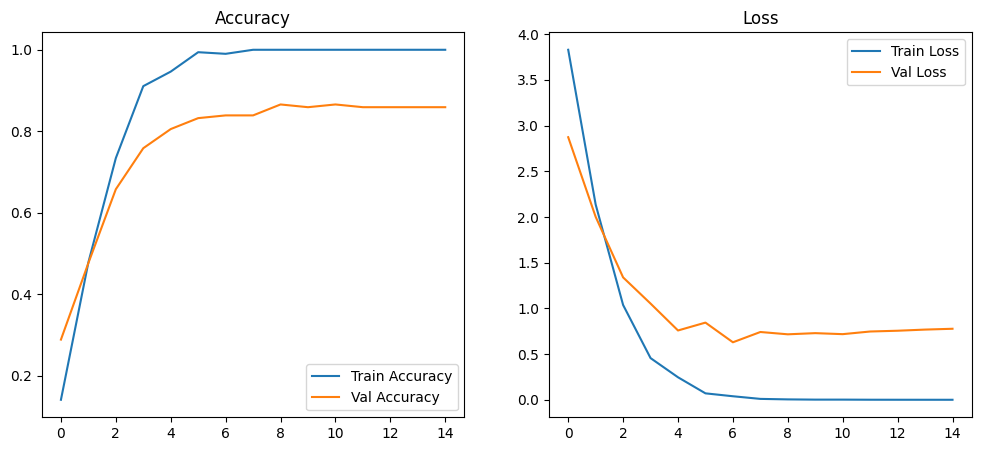

In [109]:

# Plot training and validation accuracy/loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

## <span style="color: dodgerblue;">Evaluate model on test set

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5368 - loss: 3.3743
Test Accuracy: 0.5368
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
              precision    recall  f1-score   support

           0       0.33      0.25      0.29         4
           1       0.67      0.67      0.67         6
          10       1.00      1.00      1.00        12
          11       0.75      0.68      0.71        22
          12       1.00      0.89      0.94         9
          13       0.35      1.00      0.52        11
          14       0.50      0.50      0.50         2
          15       0.44      0.73      0.55        15
          16       0.24      0.55      0.33        11
          17     

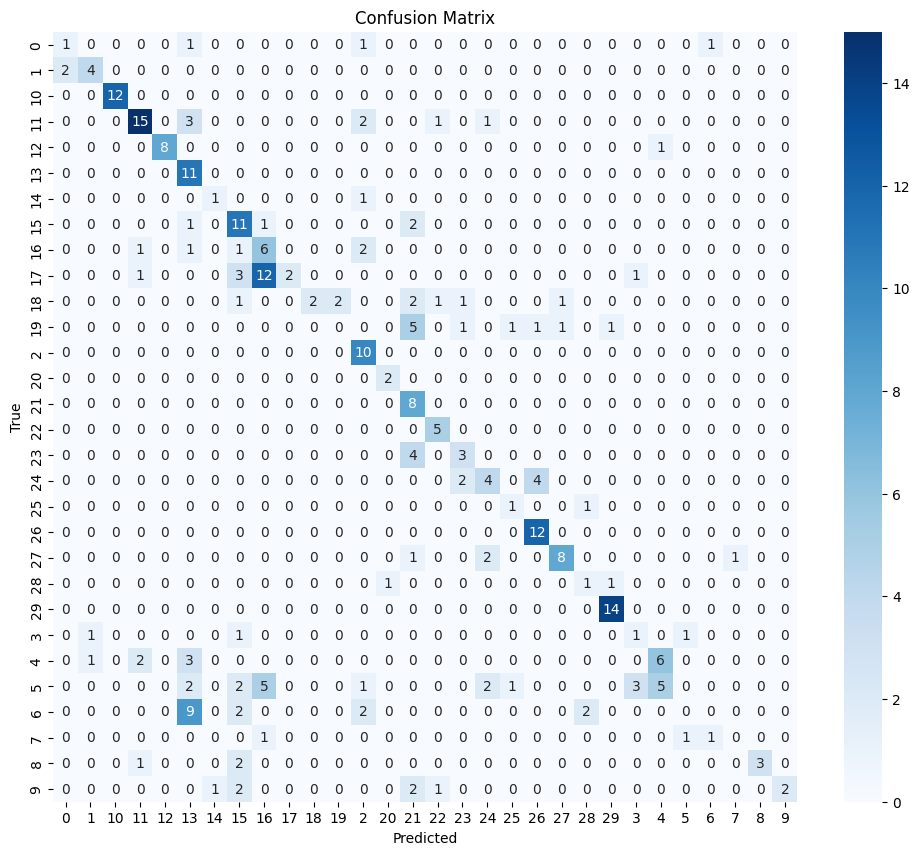

In [110]:
# Evaluate model on test set
test_loss, test_accuracy = model.evaluate(data_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions and true labels
y_true = []
y_pred = []
for images, labels in data_test:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Classification report
print(classification_report(y_true, y_pred, target_names=road_type))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=road_type, yticklabels=road_type)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [111]:
model.save("roadsigns_model.h5")


In [112]:
model = tf.keras.models.load_model("roadsigns_model.h5")


## <span style="color: dodgerblue;">Predicting a random image 


In [ ]:
image = r"C:\Users\hridhya\Downloads\RoadSigns\TEST\13\013_1_0047.png"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [133]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [134]:
score = tf.nn.softmax(predict)

In [135]:
print('road type in image is {} with accuracy of {:0.2f}'.format(road_type[np.argmax(score)],np.max(score)*100))

road type in image is 13 with accuracy of 99.81


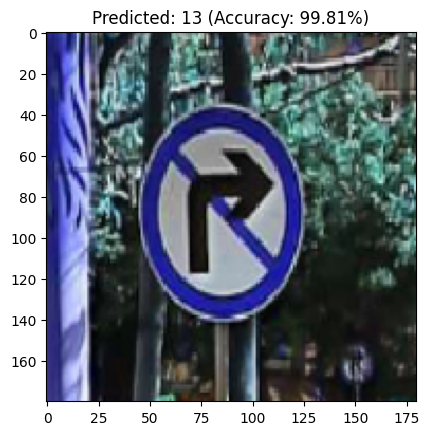

In [136]:
plt.imshow(image, cmap='gray')
plt.title('Predicted: {} (Accuracy: {:0.2f}%)'.format(road_type[np.argmax(score)], np.max(score) * 100))
plt.show()

In [ ]:
image = r"C:\Users\hridhya\Downloads\RoadSigns\TEST\10\010_1_0013_1_j.png"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [119]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [120]:
score = tf.nn.softmax(predict)

In [121]:
print('road type in image is {} with accuracy of {:0.2f}'.format(road_type[np.argmax(score)],np.max(score)*100))

road type in image is 10 with accuracy of 100.00


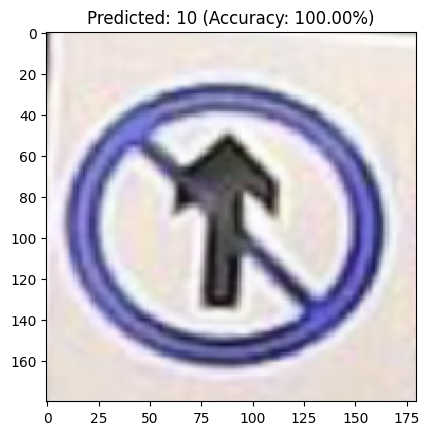

In [122]:
plt.imshow(image, cmap='gray')
plt.title('Predicted: {} (Accuracy: {:0.2f}%)'.format(road_type[np.argmax(score)], np.max(score) * 100))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
road type in image is 16 with accuracy of 99.82


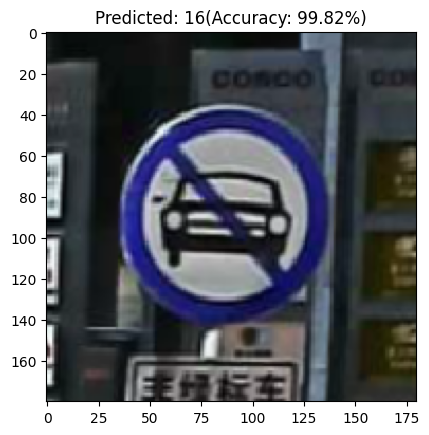

In [ ]:
image = r"C:\Users\hridhya\Downloads\RoadSigns\TEST\16\016_1_0026_1_j.png"

image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

predict = model.predict(img_bat)

score = tf.nn.softmax(predict)

print('road type in image is {} with accuracy of {:0.2f}'.format(road_type[np.argmax(score)],np.max(score)*100))

plt.imshow(image, cmap='gray')
plt.title('Predicted: {}(Accuracy: {:0.2f}%)'.format(road_type[np.argmax(score)], np.max(score) * 100))
plt.show()

In [ ]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Dataset Paths and Parameters
# ------------------------------
train_dir_data = r"C:\Users\hridhya\Downloads\RoadSigns\DATA"
test_dir_data = r"C:\Users\hridhya\Downloads\RoadSigns\TEST"
IMG_SIZE = (180, 180)
BATCH_SIZE = 32
VAL_SPLIT = 0.2

# ------------------------------
# Load Training and Validation Datasets
# ------------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir_data,
    validation_split=VAL_SPLIT,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir_data,
    validation_split=VAL_SPLIT,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

# ------------------------------
# Class Information BEFORE prefetch
# ------------------------------
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)
print("Number of classes:", num_classes)

# ------------------------------
# Data Augmentation Layer
# ------------------------------
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

# ------------------------------
# Prefetch for performance
# ------------------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# ------------------------------
# Tunable CNN Model
# ------------------------------
def build_model(hp):
    inputs = layers.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
    x = data_augmentation(inputs)
    x = layers.Rescaling(1./255)(x)

    # Conv Block 1
    filters1 = hp.Int('filters_1', 32, 64, step=16)
    k1 = hp.Choice('kernel_size_1', [3,5])
    x = layers.Conv2D(filters1, k1, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    # Conv Block 2
    filters2 = hp.Int('filters_2', 64, 128, step=32)
    k2 = hp.Choice('kernel_size_2', [3,5])
    x = layers.Conv2D(filters2, k2, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    # Conv Block 3
    filters3 = hp.Int('filters_3', 128, 256, step=64)
    x = layers.Conv2D(filters3, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D()(x)

    # Global Pooling
    x = layers.GlobalAveragePooling2D()(x)

    # Dropout
    dropout_rate = hp.Float('dropout_rate', 0.2, 0.5, step=0.1)
    x = layers.Dropout(dropout_rate)(x)

    # Dense Layer
    dense_units = hp.Int('dense_units', 128, 256, step=64)
    x = layers.Dense(dense_units, activation='relu')(x)

    outputs = layers.Dense(num_classes, activation='softmax')(x)

    lr = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=lr),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ------------------------------
# Random Search Tuner
# ------------------------------
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=8,               # increase if system allows
    executions_per_trial=1,
    directory='random_tuning',
    project_name='cnn_tuning_full'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ------------------------------
# Run Hyperparameter Search
# ------------------------------
tuner.search(
    train_ds,
    validation_data=val_ds,
    epochs=10,                  # enough epochs per trial
    callbacks=[stop_early]
)

# ------------------------------
# Build Best Model
# ------------------------------
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hp.values)

best_model = tuner.hypermodel.build(best_hp)

# ------------------------------
# Train Best Model on Full Dataset
# ------------------------------
history = best_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,                  # longer training for convergence
    callbacks=[stop_early]
)

# ------------------------------
# Evaluate on Test Dataset
# ------------------------------
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir_data,
    image_size=IMG_SIZE,
    shuffle=False,
    batch_size=BATCH_SIZE
).prefetch(buffer_size=AUTOTUNE)

test_loss, test_acc = best_model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# ------------------------------
# Prediction Function
# ------------------------------
def predict_image(model, image_path):
    image = tf.keras.utils.load_img(image_path, target_size=IMG_SIZE)
    img_arr = tf.keras.utils.img_to_array(image)
    img_arr = np.expand_dims(img_arr, axis=0) / 255.0
    pred = model.predict(img_arr)
    score = tf.nn.softmax(pred[0])
    predicted_class = class_names[np.argmax(score)]
    confidence = np.max(score) * 100
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")
    plt.imshow(image)
    plt.title(f"{predicted_class} ({confidence:.2f}%)")
    plt.axis("off")
    plt.show()

# Example usage:
# predict_image(best_model, r"C:\Users\hridhya
# \Downloads\RoadSigns\TEST\16\016_1_0026_1_j.png")


Trial 8 Complete [00h 04m 24s]
val_accuracy: 0.05999999865889549

Best val_accuracy So Far: 0.14000000059604645
Total elapsed time: 00h 25m 06s
Best hyperparameters: {'filters_1': 32, 'kernel_size_1': 5, 'filters_2': 96, 'kernel_size_2': 3, 'filters_3': 192, 'dropout_rate': 0.4, 'dense_units': 256, 'learning_rate': 0.001}
Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 769ms/step - accuracy: 0.0198 - loss: 3.4089 - val_accuracy: 0.0200 - val_loss: 3.4023
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 767ms/step - accuracy: 0.0272 - loss: 3.3982 - val_accuracy: 0.0200 - val_loss: 3.4057
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 760ms/step - accuracy: 0.0693 - loss: 3.3809 - val_accuracy: 0.0200 - val_loss: 3.3996
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 756ms/step - accuracy: 0.0718 - loss: 3.3349 - val_accuracy: 0.0300 - val_loss: 3.3677
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 749ms/step - accuracy: 0.0693 - loss: 3.2502 - val_accuracy: 0.0300 - val_loss: 3.2916
Epoch 6/30
13/13 ━━━━━━━━━━━━━━